In [11]:
# Qiskit Machine Learning

#We have a k-dimensional data sample
#We use the the data as amplitudes to the statevector

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.pulse import Schedule, ConstantPulse, Delay, DriveChannel

e:\developmentenvironments\anaconda3\envs\qiskit19_env\lib\site-packages\qiskit\pulse\pulse_lib\parametric_pulses.py:445: DeprecationWarning: The ConstantPulse is deprecated. Use Constant instead
  warnings.warn("The ConstantPulse is deprecated. Use Constant instead", DeprecationWarning)
e:\developmentenvironments\anaconda3\envs\qiskit19_env\lib\site-packages\qiskit\pulse\pulse_lib\pulse.py:46: DeprecationWarning: Calling `ConstantPulse` with a channel is deprecated. Instantiate the new `Play` instruction directly with a pulse and a channel. In this case, please use: `Play(ConstantPulse(duration=5, amp=(1+0j)), DriveChannel(0))`.
  warnings.warn("Calling `{}` with a channel is deprecated. Instantiate the new `Play` "
e:\developmentenvironments\anaconda3\envs\qiskit19_env\lib\site-packages\qiskit\pulse\pulse_lib\parametric_pulses.py:445: DeprecationWarning: The ConstantPulse is deprecated. Use Constant instead
  warnings.warn("The ConstantPulse is deprecated. Use Constant instead", Depr

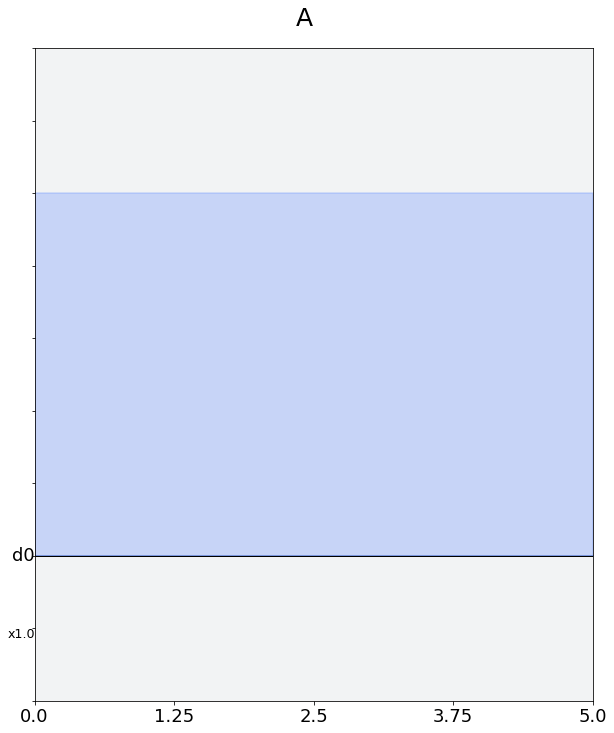

In [12]:
#Building Pulse Schedules
#Initialize dummy Schedules.
sched_a = Schedule(name="A")
sched_b = Schedule(name="B")

#Methods
#1. insert or | - schedules an Instruction or Schedule at a particular time. 
#We use it to give each of our schedules a different instruction.
#The insert schedule method overloads the | (or) operator for Schedules, 
#so we will use this special syntax on schedule B - for this operator the time argument is implicitly zero.
sched_a = sched_a.insert(0, ConstantPulse(duration=5, amp=1)(DriveChannel(0)))
sched_b |= ConstantPulse(duration=5, amp=-1)(DriveChannel(0))
sched_a.draw()



e:\developmentenvironments\anaconda3\envs\qiskit19_env\lib\site-packages\qiskit\pulse\pulse_lib\parametric_pulses.py:445: DeprecationWarning: The ConstantPulse is deprecated. Use Constant instead
  warnings.warn("The ConstantPulse is deprecated. Use Constant instead", DeprecationWarning)
e:\developmentenvironments\anaconda3\envs\qiskit19_env\lib\site-packages\qiskit\pulse\pulse_lib\pulse.py:46: DeprecationWarning: Calling `ConstantPulse` with a channel is deprecated. Instantiate the new `Play` instruction directly with a pulse and a channel. In this case, please use: `Play(ConstantPulse(duration=5, amp=(0.5+0j)), DriveChannel(0))`.
  warnings.warn("Calling `{}` with a channel is deprecated. Instantiate the new `Play` "
e:\developmentenvironments\anaconda3\envs\qiskit19_env\lib\site-packages\qiskit\pulse\pulse_lib\parametric_pulses.py:445: DeprecationWarning: The ConstantPulse is deprecated. Use Constant instead
  warnings.warn("The ConstantPulse is deprecated. Use Constant instead", De

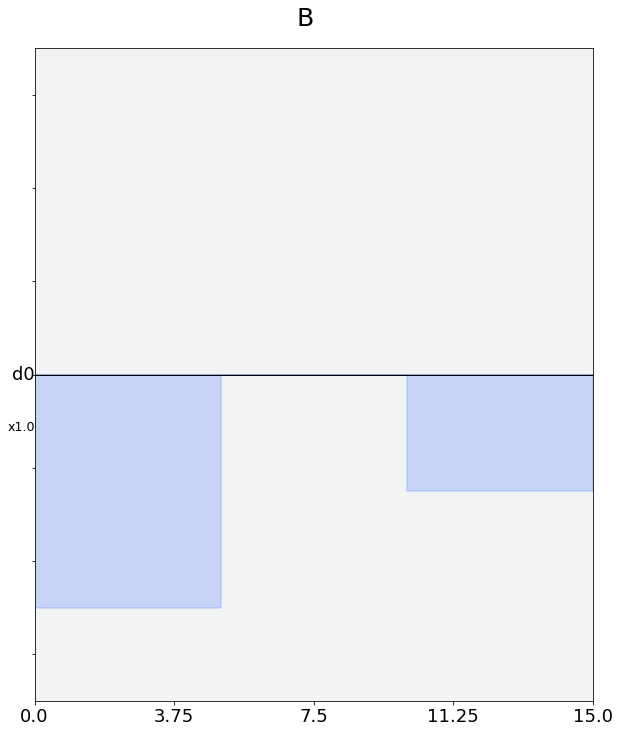

In [13]:
#2. shift or << - Sometimes we need to offset one schedule from time=0. 
#For instance, when using |, we use shift to add an instruction at a time besides zero.
sched_a |= ConstantPulse(duration=5, amp=0.5)(DriveChannel(0)).shift(10)
sched_b |= ConstantPulse(duration=5, amp=-0.5)(DriveChannel(0)) << 10
sched_b.draw()

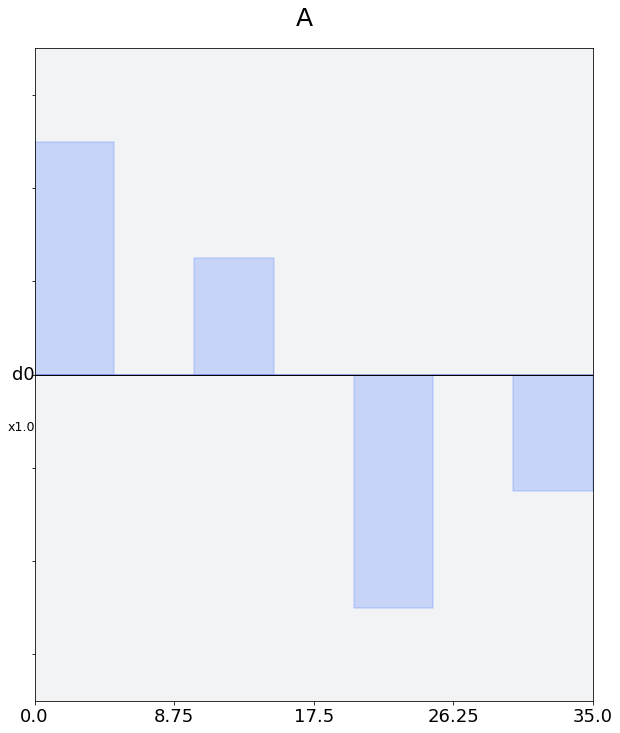

In [14]:
# compose schedules A and B together.
sched_a_and_b = sched_a.insert(20, sched_b)  # A followed by B at time 20
sched_b_and_a = sched_a | sched_b << 20      # B followed by A at time 20

sched_a_and_b.draw()

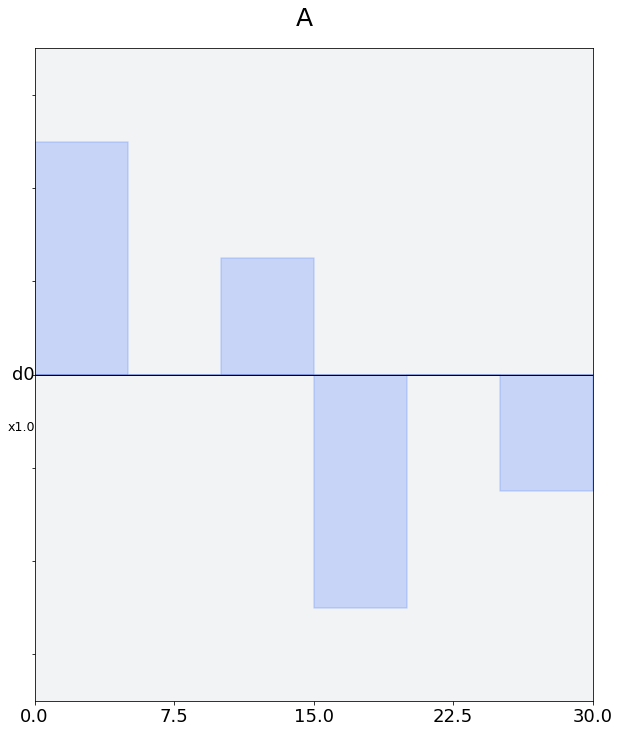

In [15]:
#3. append or +  -  like insert, but the insertion time is determined for us. 
#The Instruction or Schedule being added will begin when all the channels common to the two become free. 
#If they contain no common channels, then the Schedule will be appended at time=0. 

#The append schedule method overloads the + (add) operator for Schedules.
#Schedule A and schedule B both have instructions scheduled on the same channel, DriveChannel(0). 
#Schedule A contains positive amplitude pulses, and schedule B contains negative amplitude pulses.
sched_a_plus_b = sched_a.append(sched_b)

sched_a_plus_b.draw()

e:\developmentenvironments\anaconda3\envs\qiskit19_env\lib\site-packages\qiskit\pulse\pulse_lib\parametric_pulses.py:445: DeprecationWarning: The ConstantPulse is deprecated. Use Constant instead
  warnings.warn("The ConstantPulse is deprecated. Use Constant instead", DeprecationWarning)
e:\developmentenvironments\anaconda3\envs\qiskit19_env\lib\site-packages\qiskit\pulse\pulse_lib\pulse.py:46: DeprecationWarning: Calling `ConstantPulse` with a channel is deprecated. Instantiate the new `Play` instruction directly with a pulse and a channel. In this case, please use: `Play(ConstantPulse(duration=20, amp=(0.2+0j)), DriveChannel(1))`.
  warnings.warn("Calling `{}` with a channel is deprecated. Instantiate the new `Play` "


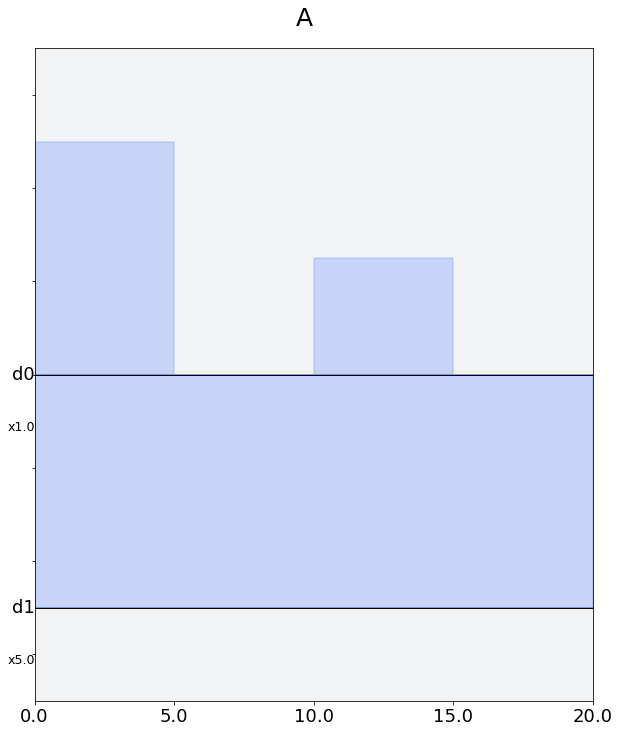

In [16]:
# For no common channels - 
#Note : Common channels is not the same as common qubits. 
#Measurements require different channels than gate operations, even on one qubit. 
#If you simply append a measurement to a schedule, you’ll likely schedule your measurement at time=0, 
#not what you were expecting! Instead, use the shift operation, with schedule.duration as the time argument.
sched_a_plus_c = sched_a + ConstantPulse(duration=20, amp=0.2)(DriveChannel(1))

sched_a_plus_c.draw()
#Since there was no common channels, the new instruction is appended at time=0, 
#because it did not have any instructions on DriveChannel(0).



e:\developmentenvironments\anaconda3\envs\qiskit19_env\lib\site-packages\qiskit\pulse\pulse_lib\parametric_pulses.py:445: DeprecationWarning: The ConstantPulse is deprecated. Use Constant instead
  warnings.warn("The ConstantPulse is deprecated. Use Constant instead", DeprecationWarning)
e:\developmentenvironments\anaconda3\envs\qiskit19_env\lib\site-packages\qiskit\pulse\pulse_lib\pulse.py:46: DeprecationWarning: Calling `ConstantPulse` with a channel is deprecated. Instantiate the new `Play` instruction directly with a pulse and a channel. In this case, please use: `Play(ConstantPulse(duration=20, amp=(-0.2+0j)), DriveChannel(0))`.
  warnings.warn("Calling `{}` with a channel is deprecated. Instantiate the new `Play` "
e:\developmentenvironments\anaconda3\envs\qiskit19_env\lib\site-packages\qiskit\pulse\pulse_lib\parametric_pulses.py:445: DeprecationWarning: The ConstantPulse is deprecated. Use Constant instead
  warnings.warn("The ConstantPulse is deprecated. Use Constant instead", 

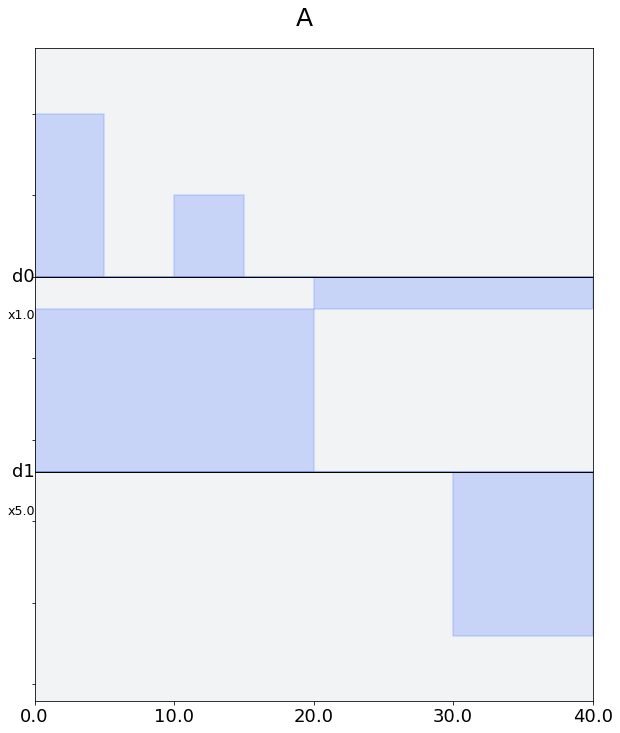

In [17]:
#Be wary: append only “slides” the appended schedule into the original around channels that are not common between them. 
#The following example demonstrates this point.
sched_d = ConstantPulse(duration=20, amp=-0.2)(DriveChannel(0)) \
          + (ConstantPulse(duration=10, amp=-0.2)(DriveChannel(1)) << 10)

(sched_a_plus_c + sched_d).draw()



In [ ]:
#Adding measurements to Schedules
#Measurement is an important part of building a Pulse schedule
#this is required to get the results of our program execution! 
#The powerful low-level control we are granted by Pulse gives us more freedom than QuantumCircuits 
#in specifying how the measurement should be done, enabling you to explore readout error mitigation. 
#This power of course comes with responsibility: we have to understand how measurement works, 
#and accomodate certain hardware constraints.

#Note: Pulse allows you to receive raw, kerneled, and disciminated readout data 
#(whereas circuits will only return discriminated data). 
#Documentation for these options can be found here-COMING SOON.

#Adding a backend-default measurement with measure
#To add measurements as easily to Schedules as to QuantumCircuits, 
#we just have to know which qubits we want to measure (below, qubits 0 and 1) and 
#have a OpenPulse-enabled backend:

# Appending a measurement schedule to a Schedule, sched
#from qiskit.scheduler import measure
#sched += measure([0, 1], backend) << sched.duration

#The backend contains a default definition for measurement, which is tailored to the qubits you are measuring.
from qiskit.test.mock import FakeAlmaden
backend = FakeAlmaden()

#Basic measurement pattern and measure_all
#we use the default measurement feature to inspect a measurement and 
#learn what each pulse does. 

#we use measure_all, which measures all the qubits on the backend.
from qiskit.pulse import Schedule
from qiskit.scheduler import measure_all

sched = Schedule(name="Measurement scheduling example")
sched += measure_all(backend)

sched.draw()

#Each qubit has two channels related to readout, as we see below. 
#These are the readout transmit MeasureChannels, and the readout receive AcquireChannels. 
#In superconducting qubit architectures, qubits are coupled to readout resonators. 
#The MeasureChannel and AcquireChannels label signal lines which connect to the readout resonator. 
#The coupling between the qubit and the readout resonator hybridizes their state, 
#so when a stimulus pulse is sent to the readout resonantor, the reflected pulse is dependent on the state of the qubit. 
#The acquisition “pulse” is truly a trigger specifying to the analog-to-digital converter (ADC) 
#to begin collecting data, and for how long. That data is used to classify the qubit state.